# Importing libraries

In [480]:
import pandas as pd
import numpy as np

# Understanding our dataset and cleaning unnecessary things

In [481]:
path = 'C:/Users/fatima/Documents/programs/Projetos/Skin_types/skin_products/skincare.csv'

In [482]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Title,Product,Category,Brand,Skin_Type,Number of items,Sold By,Price,Link
0,0,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,SKINCARE,Nivea,All,1,AIR SALES,372,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,1,"Nivea Soft Playful Peach, Light Moistu...",Moisturizer,SKINCARE,Nivea,All,1,RK World Infocom Pvt Ltd,226,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,2,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,SKINCARE,Nivea,Dry,1,MURALI RETAILS,103,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,3,Biotique Morning Nectar Flawless Skin ...,Moisturizer,SKINCARE,Biotique,Combination,1,RK World Infocom Pvt Ltd,240,https://www.amazon.in/Biotique-Morning-Nectar-...
4,4,Minimalist Marula Oil 5% Face Moisturi...,Moisturizer,SKINCARE,Minimalist,Dry,1,Minimalist Inc,284,https://www.amazon.in/Minimalist-Moisturizer-H...


In [483]:
# Checking the categories
df['Category'].unique()

# Since there's only one categorie, this collumn is unnecessary

array(['SKINCARE'], dtype=object)

In [484]:
# dropping unecessary columns
df = df.drop(['Unnamed: 0', 'Category', 'Number of items'], axis=1)


# PS: The number of items would be interesting if we could check at live if the product is in stock
#     since this isn't the case, the best action is to remove it.

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      1438 non-null   object
 1   Product    1438 non-null   object
 2   Brand      1438 non-null   object
 3   Skin_Type  1438 non-null   object
 4   Sold By    1231 non-null   object
 5   Price      1438 non-null   int64 
 6   Link       1438 non-null   object
dtypes: int64(1), object(6)
memory usage: 78.8+ KB


In [486]:
# Checking for null/na values
print(f'Null values: {df.isnull().sum()}')
print('---------------------------------')
print(f'\n\n\nNA values: {df.isna().sum()}')

Null values: Title          0
Product        0
Brand          0
Skin_Type      0
Sold By      207
Price          0
Link           0
dtype: int64
---------------------------------



NA values: Title          0
Product        0
Brand          0
Skin_Type      0
Sold By      207
Price          0
Link           0
dtype: int64


In [487]:
# Sold By has lots of missing values and for our case it's not an essential information
df = df.drop('Sold By', axis=1)

In [488]:
print(f'QTD unique values in skins type: {df["Skin_Type"].nunique()}')
print('----------------------------------')
print(f'Unique values: {df["Skin_Type"].unique()}')

QTD unique values in skins type: 57
----------------------------------
Unique values: ['All' 'Dry' 'Combination' 'All, Combination, Sensitive, Dry, Normal'
 'Normal' 'Sensitive, Dry' 'Oily, Acne Prone' 'Dry, Normal' 'Acne' 'Oily'
 'Oily, Acne Prone, Sensitive' 'All, Acne' 'Dry, Normal Skin' 'All, Dry'
 'Sensitive' 'Oily, Combination, Dry, Normal' 'Normal to Dry skin'
 'All, Oily, Combination, Sensitive, Normal' 'Oily, Combination'
 'All, Oily, Combination, Dry, Normal' 'All, Sensitive' 'Dry;Combination'
 'All, especially extra-dry skin' 'Normal to Oily Skin' 'Acne, Dry'
 'All, Combination, Normal' 'All, Oily, Combination, Sensitive, Dry'
 'Oily, Combination, Sensitive'
 'All, Oily, Combination, Acne Prone, Dry, Normal' 'All Skin Types,Oily'
 'All Skin Type' 'Acne Prone' 'Acne Prone,Oily,Dry,All Skin Types'
 'All, Oily, Sensitive, Dry, Normal'
 'All Skin, Oily, Combination, Sensitive, Dry, Normal'
 'Dry,All Skin Types' 'Acne Prone,All Skin Types'
 'Oily, Combination, Sensitive, Dry, Nor

In [489]:
# Transforming the information in our column in lists os values
df['Skin_Type'] = df['Skin_Type'].apply(lambda x: x.split(', '))

In [490]:
# Looking for all the unique products
df['Product'].unique()

array(['Moisturizer', 'Primer', 'Facial sprays', 'Hand cream',
       'Nail paint'], dtype=object)

In [491]:
# Checking the nail paints 
# filter_products = df.loc[df['Product'] == 'Nail paint']
# print(filter_products)

# Cleaning the products that are not necessary for this project
df = df[df['Product'] != 'Nail paint']
df = df[df['Product'] != 'Hand cream']
df

,Title,Product,Brand,Skin_Type,Price,Link
0,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,Nivea,[All],372,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,"Nivea Soft Playful Peach, Light Moistu...",Moisturizer,Nivea,[All],226,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,Nivea,[Dry],103,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Biotique Morning Nectar Flawless Skin ...,Moisturizer,Biotique,[Combination],240,https://www.amazon.in/Biotique-Morning-Nectar-...
4,Minimalist Marula Oil 5% Face Moisturi...,Moisturizer,Minimalist,[Dry],284,https://www.amazon.in/Minimalist-Moisturizer-H...
...,...,...,...,...,...,...
855,evanhealy Heat of Summer HydroSoul Fac...,Facial sprays,Evanhealy,[All],6358,https://www.amazon.in/evanhealy-HydroSoul-Hydr...
856,"D'MOKSHA Wine Vine Face Toner, Face Mi...",Facial sprays,D'MOKSHA,[Acne Prone Skin],300,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
857,Love Earth Jasmine Mogra Face Mist Ton...,Facial sprays,Love Earth,[All],199,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
858,EcstaCBeauty Cure Skin Anti-Breakout F...,Facial sprays,EcstaCBeauty,[Sensitive],149,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


# Visualizations

###  Lybraries

In [492]:
import matplotlib.pyplot as plt
import seaborn as sns

### Graphics

* Graphic 1:

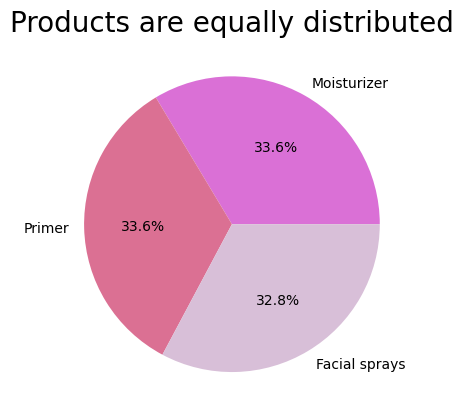

In [493]:
# variables
count_fs = (df['Product'] == 'Facial sprays').sum()
count_m =  (df['Product'] == 'Moisturizer').sum()
count_p =  (df['Product'] == 'Primer').sum()

# Values for the plot
values_prod = [count_m,  count_p, count_fs]
products = list(df['Product'].unique())

""" CHECKING THE VALUES
print(values_prod)
print(products)
r = 0
for i in values_prod:           # r must be 860
    r += i
print(r)
"""

# Graph
fig, ax = plt.subplots()
ax.pie(values_prod, 
       labels = products, 
       autopct='%1.1f%%', 
       colors=['orchid', 'palevioletred', 'thistle'])


ax.set_title('Products are equally distributed', fontweight= 'roman', fontsize=20)

plt.show()


* Graphic 2:

In [494]:
# This function calculates the frequency tha each brand appears in our DF - Different products on Sale
def count_brand(df, brand):
    c=0
    for i in df:
        if i == brand:
            c +=1
    return c

# I chose to heighlight brands that can be easily found in Brasil
nivea       = count_brand(df['Brand'], 'Nivea')
cetaphil    = count_brand(df['Brand'], 'Cetaphil')
neutrogena  = count_brand(df['Brand'], 'Neutrogena')
bioderma    = count_brand(df['Brand'], 'Bioderma')
loreal      = count_brand(df['Brand'], "L'Oreal Paris")
cerave      = count_brand(df['Brand'], 'CeraVe')
la_roche    = count_brand(df['Brand'], 'La Roche-Posay')
garnier     = count_brand(df['Brand'], 'Garnier')
dove        = count_brand(df['Brand'], 'Dove')
maybelline  = count_brand(df['Brand'], 'Maybelline')

# Saving results in a list with the same order
values = [nivea, cetaphil, neutrogena, bioderma, loreal, cerave, la_roche, garnier, dove, maybelline]
brand = ['Nivea', 'Cetaphil', 'Neutrogena', 'Bioderma', "L'Oreal Paris", 
         'CeraVe', 'La Roche-Posay', 'Garnier', 'Dove', 'Maybelline']

data = { 'Brand' : brand, 'Values': values}

# Sorting our values in decrecent order
data = (pd.DataFrame(data)).sort_values(by='Values', ascending=True)


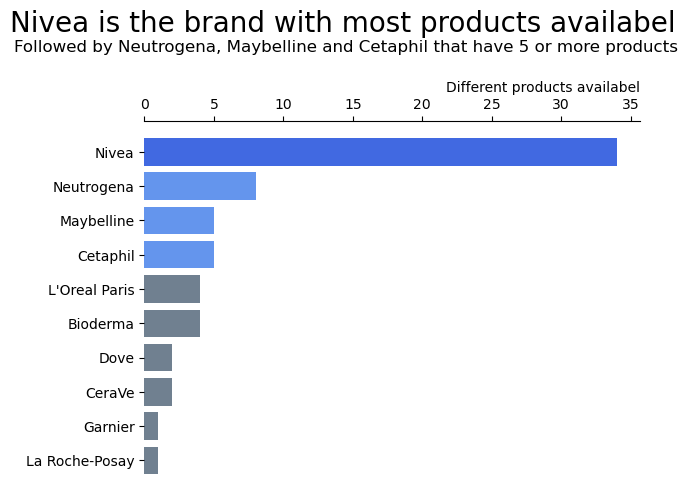

In [495]:
# Visualizing informations
fig, ax = plt.subplots()
ax.barh(data['Brand'], data['Values'],
        color = ['slategray', 'slategray', 'slategray', 
                 'slategray', 'slategray','slategray', 
                 'cornflowerblue', 'cornflowerblue', 
                 'cornflowerblue', 'royalblue'])

# Titles
plt.title('Nivea is the brand with most products availabel', fontweight= 'roman', fontsize=20, x=0.4, y=1.22)
plt.suptitle('Followed by Neutrogena, Maybelline and Cetaphil that have 5 or more products', fontweight='light', x=0.44 ,y=1.05)

plt.xlabel('Different products availabel', loc='right')

# Removing lines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Moving xlabel to the top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.show()

* Graph 3

In [496]:
# This function calculates the avg price for each brand
def mean_price_b(df, b):
    product_prices = df[df['Brand'] == b]['Price']
    
    if len(product_prices) == 0:
        return f"Brand {b} not found."

    return product_prices.mean()

# I chose to heighlight brands that can be easily found in Brasil
nivea       = mean_price_b(df, 'Nivea')
cetaphil    = mean_price_b(df, 'Cetaphil')
neutrogena  = mean_price_b(df, 'Neutrogena')
bioderma    = mean_price_b(df, 'Bioderma')
loreal      = mean_price_b(df, "L'Oreal Paris")
cerave      = mean_price_b(df, 'CeraVe')
la_roche    = mean_price_b(df, 'La Roche-Posay')
garnier     = mean_price_b(df, 'Garnier')
dove        = mean_price_b(df, 'Dove')
maybelline  = mean_price_b(df, 'Maybelline')

# Saving parameter
mean_b = [nivea, cetaphil, neutrogena, bioderma, loreal, cerave, la_roche, garnier, dove, maybelline]

mean_b = { 'Brand' : brand, 'Mean': mean_b}

# Sorting our values in decrecent order
mean_b = (pd.DataFrame(mean_b)).sort_values(by='Mean', ascending=False)


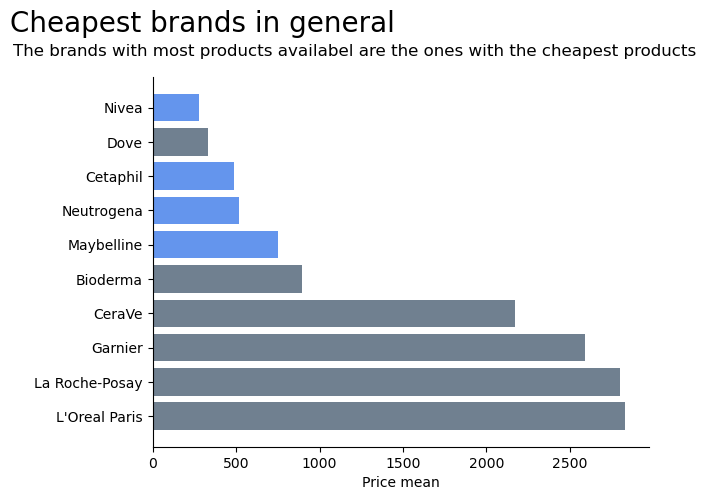

In [497]:
fig, ax = plt.subplots()
ax.barh(mean_b['Brand'], mean_b['Mean'],
       color = [ 'slategray', 'slategray','slategray', 
                'slategray', 'slategray', 'cornflowerblue',
                'cornflowerblue','cornflowerblue', 'slategray', 
                'cornflowerblue'])


# Titles
plt.title('Cheapest brands in general', fontweight= 'roman', fontsize=20, x=0.1, y=1.1)
plt.suptitle('The brands with most products availabel are the ones with the cheapest products', x=0.44, y=0.95)
plt.xlabel('Price mean')


# Removing lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

* Graph 4

In [498]:
# This function calculates the avg price for each product
def mean_price(df, p):
    product_prices = df[df['Product'] == p]['Price']
    
    if len(product_prices) == 0:
        return f"Product {p} not found."

    return product_prices.mean()

# Calling function
moist_mean = mean_price(df, "Moisturizer")
primer_mean = mean_price(df, "Primer")
spray_mean = mean_price(df, "Facial sprays")

# Saving parameter
means = [moist_mean, primer_mean, spray_mean]
mean_p = { 'Product' : products, 'Mean': means}

# Sorting our values in decrecent order
mean_p = (pd.DataFrame(mean_p)).sort_values(by='Mean', ascending=False)


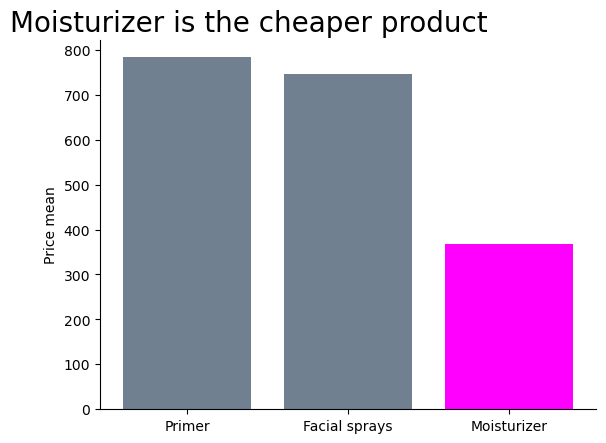

In [499]:
fig, ax = plt.subplots()
ax.bar(mean_p['Product'], mean_p['Mean'],
       color = ['slategray', 'slategray', 'magenta',])


# Titles
plt.title('Moisturizer is the cheaper product', fontweight= 'roman', fontsize=20, x=0.3)

plt.ylabel('Price mean')


# Removing lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


# Apllying filters to get the best product for our client

In [500]:
# This function gets the result of the image classifier model


In [501]:
# This function finds the products for the clients skin
def finds_product(client_skin, df):
    return df[df['Skin_Type'].apply(lambda x: client_skin in x)]

result = finds_product('Dry', df)

In [502]:
result

,Title,Product,Brand,Skin_Type,Price,Link
2,"Nivea Soft Light Moisturizer For Face,...",Moisturizer,Nivea,[Dry],103,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,Minimalist Marula Oil 5% Face Moisturi...,Moisturizer,Minimalist,[Dry],284,https://www.amazon.in/Minimalist-Moisturizer-H...
5,Cetaphil Moisturizing Lotion for Norma...,Moisturizer,Cetaphil,"[All, Combination, Sensitive, Dry, Normal]",413,https://www.amazon.in/Cetaphil-Moisturizing-Lo...
10,Parachute Advansed Deep Nourish Body L...,Moisturizer,Parachute Advansed,[Dry],167,https://www.amazon.in/Parachute-Advansed-Body-...
12,Cetaphil DAM Daily Advance Ultra Hydra...,Moisturizer,Cetaphil,"[Sensitive, Dry]",199,https://www.amazon.in/Cetaphil-Daily-Advance-H...
...,...,...,...,...,...,...
814,WishCare 100% Pure & Natural Rose Wate...,Facial sprays,WishCare,"[Oily, Combination, Sensitive, Dry, Normal]",349,https://www.amazon.in/WishCare%C2%AE-Pure-Natu...
815,Biotic Herbs Pure & Natural Premium Gu...,Facial sprays,Biotic Herbs,"[All, Oily, Combination, Sensitive, Dry]",229,https://www.amazon.in/Biotic-Herbs-Natural-Pre...
818,Heroic rose mist 100% Pure and natural...,Facial sprays,HEROIC,"[All, Oily, Dry, Normal]",190,https://www.amazon.in/Heroic-rose-mist-natural...
821,Herbsense Pure Rose Water/Gulab Jal Sp...,Facial sprays,Herbsense,"[Oily, Combination, Sensitive, Dry, Normal]",449,https://www.amazon.in/Herbsense-Hydrating-Refr...


In [503]:
# Importing libraries to create a report with all the products 
# for the clients skin type
from tabulate import tabulate
from fpdf import FPDF